In [1]:
import math
import numpy as np
from numpy.testing import assert_allclose

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

from numcosmo_py import Nc, Ncm
from numcosmo_py.plotting.tools import set_rc_params_article

In [2]:
Ncm.cfg_init()

In [3]:
cosmo = Nc.HICosmoQGRW()
cosmo.props.w = 1.0e-5
cosmo.props.Omegar = 1.0 * (1.0e-5)
cosmo.props.Omegaw = 1.0 * (1.0 - 1.0e-5)
cosmo.props.xb = 1.0e30

k = 1.0
min_alpha_c = -120.0
max_alpha_c = -1.0
min_alpha_scale = 1.0e-12
np_plot = 1000

# Time arrays for the contraction and bounce phases

alpha_c = np.linspace(min_alpha_c, max_alpha_c, np_plot)
alpha_b_e = np.geomspace(min_alpha_scale, 2.0, np_plot)
alpha_b = np.concatenate((np.flip(-alpha_b_e), alpha_b_e))

# Computing background observables in the contraction phase

m_s_c = np.array([cosmo.eom_eval(alpha, k).m_s for alpha in alpha_c])
m_zeta_c = np.array([cosmo.eom_eval(alpha, k).m_zeta for alpha in alpha_c])
mnu2_s_c = np.array([cosmo.eom_eval(alpha, k).mnu2_s for alpha in alpha_c])
mnu2_zeta_c = np.array([cosmo.eom_eval(alpha, k).mnu2_zeta for alpha in alpha_c])
nu1_c = np.array([cosmo.eom_eval(alpha, k).nu1 for alpha in alpha_c])
nu2_c = np.array([cosmo.eom_eval(alpha, k).nu2 for alpha in alpha_c])
nu_s_c = np.sqrt(mnu2_s_c / m_s_c)
nu_zeta_c = np.sqrt(mnu2_zeta_c / m_zeta_c)
y_c = np.array([cosmo.eom_eval(alpha, k).y for alpha in alpha_c])
gamma11_c = np.array([cosmo.eom_eval(alpha, k).gammabar11 for alpha in alpha_c])
gamma22_c = np.array([cosmo.eom_eval(alpha, k).gammabar22 for alpha in alpha_c])
gamma12_c = np.array([cosmo.eom_eval(alpha, k).gammabar12 for alpha in alpha_c])
tau_c = np.array([cosmo.eom_eval(alpha, k).taubar for alpha in alpha_c])

# Computing background observables in the bounce phase

m_s_b = np.array([cosmo.eom_eval(alpha, k).m_s for alpha in alpha_b])
m_zeta_b = np.array([cosmo.eom_eval(alpha, k).m_zeta for alpha in alpha_b])
mnu2_s_b = np.array([cosmo.eom_eval(alpha, k).mnu2_s for alpha in alpha_b])
mnu2_zeta_b = np.array([cosmo.eom_eval(alpha, k).mnu2_zeta for alpha in alpha_b])
nu1_b = np.array([cosmo.eom_eval(alpha, k).nu1 for alpha in alpha_b])
nu2_b = np.array([cosmo.eom_eval(alpha, k).nu2 for alpha in alpha_b])
nu_s_b = np.sqrt(mnu2_s_b / m_s_b)
nu_zeta_b = np.sqrt(mnu2_zeta_b / m_zeta_b)
y_b = np.array([cosmo.eom_eval(alpha, k).y for alpha in alpha_b])
gamma11_b = np.array([cosmo.eom_eval(alpha, k).gammabar11 for alpha in alpha_b])
gamma22_b = np.array([cosmo.eom_eval(alpha, k).gammabar22 for alpha in alpha_b])
gamma12_b = np.array([cosmo.eom_eval(alpha, k).gammabar12 for alpha in alpha_b])
tau_b = np.array([cosmo.eom_eval(alpha, k).taubar for alpha in alpha_b])

cos2_phi_c = (nu1_c**2 * nu_zeta_c**2 - nu2_c**2 * nu_s_c**2) / (nu1_c**4 - nu2_c**4)
sin2_phi_c = (nu1_c**2 * nu_s_c**2 - nu2_c**2 * nu_zeta_c**2) / (nu1_c**4 - nu2_c**4)

cos2_phi_b = (nu1_b**2 * nu_zeta_b**2 - nu2_b**2 * nu_s_b**2) / (nu1_b**4 - nu2_b**4)
sin2_phi_b = (nu1_b**2 * nu_s_b**2 - nu2_b**2 * nu_zeta_b**2) / (nu1_b**4 - nu2_b**4)

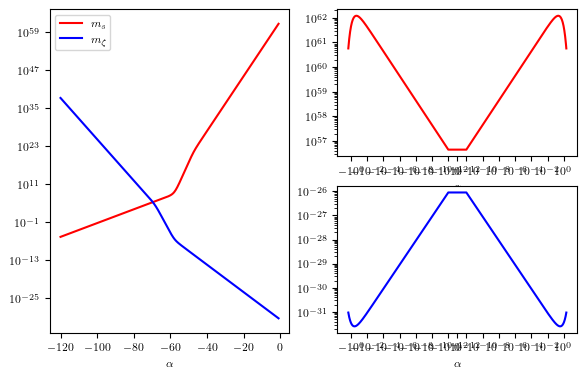

In [4]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 4)

ax1.plot(alpha_c, m_s_c, c="r", label=r"$m_s$")
ax1.plot(alpha_c, m_zeta_c, c="b", label=r"$m_\zeta$")
ax1.set_yscale("log")
ax1.set_xlabel(r"$\alpha$")

ax2.plot(alpha_b, m_s_b, c="r", label=r"$m_s$")
ax2.set_xscale("symlog", linthresh=min_alpha_scale)
ax2.set_yscale("log")
ax2.set_xlabel(r"$\alpha$")

ax3.plot(alpha_b, m_zeta_b, c="b", label=r"$m_\zeta$")
ax3.set_xscale("symlog", linthresh=min_alpha_scale)
ax3.set_yscale("log")
ax3.set_xlabel(r"$\alpha$")

ax1.legend()

pass

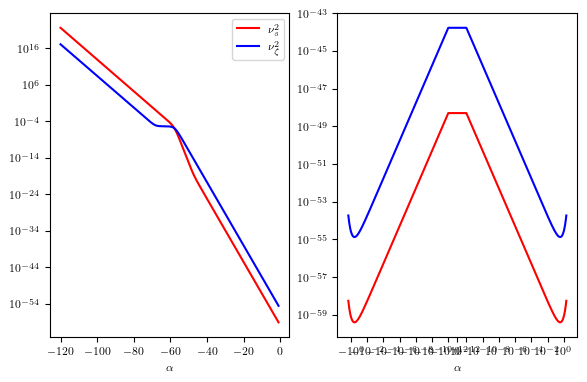

In [5]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(alpha_c, mnu2_s_c / m_s_c, c="r", label=r"$\nu_s^2$")
ax1.plot(alpha_c, mnu2_zeta_c / m_zeta_c, c="b", label=r"$\nu_\zeta^2$")
ax1.set_yscale("log")
ax1.set_xlabel(r"$\alpha$")
ax1.legend()

ax2.plot(alpha_b, mnu2_s_b / m_s_b, c="r", label=r"$\nu_s^2$")
ax2.plot(alpha_b, mnu2_zeta_b / m_zeta_b, c="b", label=r"$\nu_\zeta^2$")
ax2.set_xscale("symlog", linthresh=min_alpha_scale)
ax2.set_yscale("log")
ax2.set_xlabel(r"$\alpha$")

pass

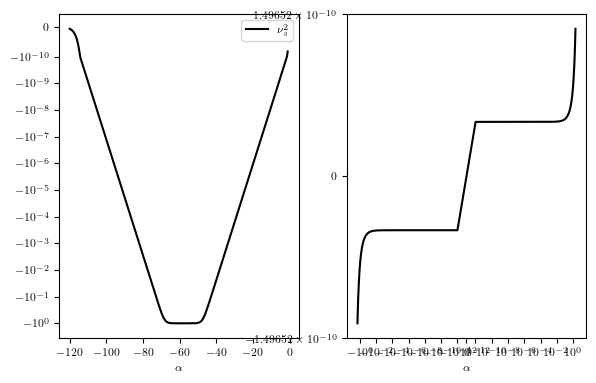

In [6]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(alpha_c, y_c * np.sqrt(m_s_c * m_zeta_c), c="k", label=r"$\nu_s^2$")
ax1.set_yscale("symlog", linthresh=1.0e-10)
ax1.set_xlabel(r"$\alpha$")

ax2.plot(alpha_b, y_b * np.sqrt(m_s_b * m_zeta_b), c="k", label=r"$\nu_s^2$")
ax2.set_xscale("symlog", linthresh=min_alpha_scale)
ax2.set_yscale("symlog")
ax2.set_xlabel(r"$\alpha$")

ax1.legend()

pass

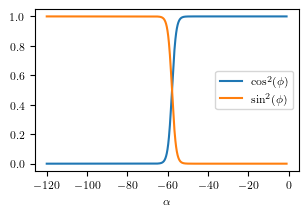

In [7]:
set_rc_params_article(ncol=1)
fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)

ax1.plot(alpha_c, cos2_phi_c, label=r"$\cos^2(\phi)$")
ax1.plot(alpha_c, sin2_phi_c, label=r"$\sin^2(\phi)$")
ax1.set_xlabel(r"$\alpha$")
ax1.legend()
pass

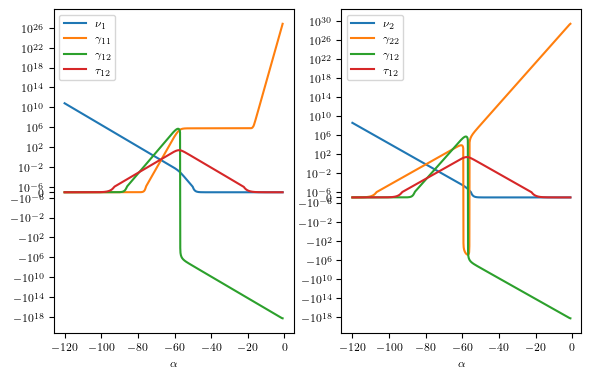

In [8]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(alpha_c, nu1_c, label=r"$\nu_1$")
ax1.plot(alpha_c, gamma11_c, label=r"$\gamma_{11}$")
ax1.plot(alpha_c, gamma12_c, label=r"$\gamma_{12}$")
ax1.plot(alpha_c, tau_c, label=r"$\tau_{12}$")

ax1.set_yscale("symlog", linthresh=1.0e-6)
ax1.set_xlabel(r"$\alpha$")
ax1.legend()

ax2.plot(alpha_c, nu2_c, label=r"$\nu_2$")
ax2.plot(alpha_c, gamma22_c, label=r"$\gamma_{22}$")
ax2.plot(alpha_c, gamma12_c, label=r"$\gamma_{12}$")
ax2.plot(alpha_c, tau_c, label=r"$\tau_{12}$")

ax2.set_yscale("symlog", linthresh=1.0e-6)
ax2.set_xlabel(r"$\alpha$")
ax2.legend()

pass

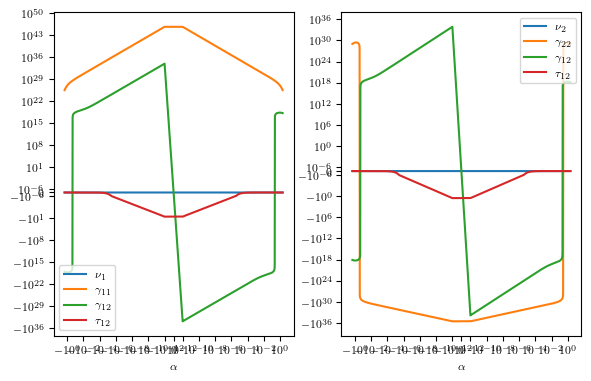

In [9]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(alpha_b, nu1_b, label=r"$\nu_1$")
ax1.plot(alpha_b, gamma11_b, label=r"$\gamma_{11}$")
ax1.plot(alpha_b, gamma12_b, label=r"$\gamma_{12}$")
ax1.plot(alpha_b, tau_b, label=r"$\tau_{12}$")
ax1.set_xscale("symlog", linthresh=min_alpha_scale)
ax1.set_yscale("symlog", linthresh=1.0e-6)
ax1.set_xlabel(r"$\alpha$")

ax1.legend()

ax2.plot(alpha_b, nu2_b, label=r"$\nu_2$")
ax2.plot(alpha_b, gamma22_b, label=r"$\gamma_{22}$")
ax2.plot(alpha_b, gamma12_b, label=r"$\gamma_{12}$")
ax2.plot(alpha_b, tau_b, label=r"$\tau_{12}$")
ax2.set_xscale("symlog", linthresh=min_alpha_scale)
ax2.set_yscale("symlog", linthresh=1.0e-6)
ax2.set_xlabel(r"$\alpha$")
ax2.legend()

pass

In [10]:
def get_zeta(v):
    return v.get(Nc.HIPertITwoFluidsVars.ZETA_R) + 1.0j * v.get(
        Nc.HIPertITwoFluidsVars.ZETA_I
    )


def get_S(v):
    return v.get(Nc.HIPertITwoFluidsVars.S_R) + 1.0j * v.get(
        Nc.HIPertITwoFluidsVars.S_I
    )


def get_Pzeta(v):
    return v.get(Nc.HIPertITwoFluidsVars.PZETA_R) + 1.0j * v.get(
        Nc.HIPertITwoFluidsVars.PZETA_I
    )


def get_PS(v):
    return v.get(Nc.HIPertITwoFluidsVars.PS_R) + 1.0j * v.get(
        Nc.HIPertITwoFluidsVars.PS_I
    )

In [11]:
from concurrent.futures import ProcessPoolExecutor, as_completed

H0 = 70.0
w = 1.0e-1
xb = 1.0e30
Omegar = 1.0e-5
Omegaw = 1.0 - Omegar

cosmo_rw = Nc.HICosmoQGRW.new()

cosmo_rw["H0"] = H0  # Set the Hubble constant
cosmo_rw["w"] = w  # Set the dark energy equation of state
cosmo_rw["xb"] = xb  # Set bounce depth
cosmo_rw["Omegar"] = Omegar  # Set radiation fraction
cosmo_rw["Omegaw"] = Omegaw  # Set dark matter fraction

RH_Mpc = cosmo_rw.RH_Mpc()

# Define the k values for the power spectrum
k_for_pk_a = np.geomspace(1.0e-3, 1.0e8, 300)
k_for_plot_a = np.geomspace(1.0e-3, 1.0e8, 6000)

# Compute the individual speeds of sound
c1 = np.sqrt(1.0 / 3.0)
c2 = np.sqrt(w)

# Set the relative tolerance for the adiabatic approximation
reltol = 1.0e-9

# Define the initial and final time limits for evolution
alpha_ini_integ = -160
alpha_adiab_max = -1.0e-1  # Maximum time for adiabatic vacuum
alpha_end_integ = cosmo_rw.abs_alpha(1.0e15)

alpha_mode_ini = -110.0  # Initial time in alpha for the mode evolution
alpha_mode_end = -10.0  # Final time in alpha for the mode evolution

alpha_pk_ini = -110.0  # Initial time in alpha for the power spectrum
alpha_pk_end = cosmo_rw.abs_alpha(1.0e15)  # Final time in alpha for the power spectrum


def compute_for_w(w):
    cosmo_rw = Nc.HICosmoQGRW.new()
    cosmo_rw["H0"] = H0
    cosmo_rw["w"] = w
    cosmo_rw["xb"] = xb
    cosmo_rw["Omegar"] = Omegar
    cosmo_rw["Omegaw"] = Omegaw

    pert = Nc.HIPertTwoFluids.new()
    pert.props.reltol = reltol
    pert.set_initial_time(alpha_ini_integ)
    pert.set_final_time(alpha_end_integ)
    pert.set_wkb_reltol(1.0e-3)

    s_interp = pert.compute_spectra(cosmo_rw, [alpha_pk_end], k_for_pk_a, None)
    pk = [
        (
            s_interp[0]
            .eval(cosmo_rw, k)
            .eval_obs(
                Nc.HIPertITwoFluidsObsMode.BOTH,
                Nc.HIPertITwoFluidsObs.ZETA,
                Nc.HIPertITwoFluidsObs.ZETA,
            )
        )
        for k in k_for_plot_a
    ]

    return w, pk

In [12]:
pks = {}

w_a = np.geomspace(1.0e-5, 1.0e-1, 10)

with ProcessPoolExecutor(max_workers=12) as executor:
    futures = [executor.submit(compute_for_w, w) for w in w_a]

    for fut in tqdm(
        as_completed(futures),
        total=len(futures),
        desc="Computing spectra (parallel)",
        unit="w",
    ):
        w, pk = fut.result()
        pks[w] = pk

Computing spectra (parallel):   0%|          | 0/10 [00:00<?, ?w/s]

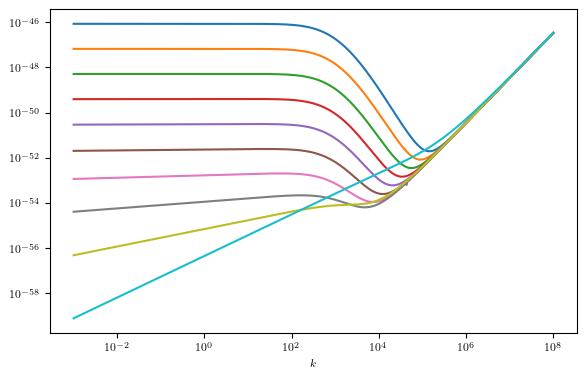

In [13]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)

for w, pk in sorted(pks.items()):

    lnk_a = np.log(k_for_plot_a)
    lnPk_a = np.log(pk)

    ax1.plot(np.exp(lnk_a), np.exp(3.0 * lnk_a + lnPk_a), label=r"$k^3|\zeta|^2$")

ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r"$k$")
# ax1.legend()

pass

In [14]:
lnk_v = Ncm.Vector.new_array(np.log(k_for_plot_a))
lnw_v = Ncm.Vector.new_array(np.log(w_a))
zm = Ncm.Matrix.new(lnw_v.len(), lnk_v.len())
lnPk0_a = []

for i, (w, pk) in enumerate(sorted(pks.items())):
    lnPk_a = np.log(k_for_plot_a**3 * pk)
    lnPk_v = Ncm.Vector.new_array(lnPk_a - lnPk_a[0])
    lnPk0_a.append(lnPk_a[0])
    zm.set_row(i, lnPk_v)

lnPk0_v = Ncm.Vector.new_array(lnPk0_a)

In [15]:
s = Ncm.Spline2dBicubic.notaknot_new()
s.set(lnk_v, lnw_v, zm, True)

s0 = Ncm.SplineCubicNotaknot.new()
s0.set(lnw_v, lnPk0_v, True)

<NumCosmoMath.SplineCubicNotaknot object at 0x7f0dd0c38740 (NcmSplineCubicNotaknot at 0x556fcc1b8380)>

In [16]:
s0.is_init()

True

In [17]:
for i, (w, pk) in enumerate(sorted(pks.items())):
    lnk_a = np.log(k_for_plot_a)
    lnPk_a = np.log(k_for_plot_a**3 * pk)
    lnPk_eval = np.array([s.eval(lnk, np.log(w)) for lnk in lnk_a])
    assert_allclose(lnPk_a - lnPk_a[0], lnPk_eval, rtol=1.0e-12)

In [18]:
hiprim_2f = Nc.HIPrimTwoFluids()
hiprim_pl = Nc.HIPrimPowerLaw()
hiprim_2f.set_lnk_lnw_spline(s)

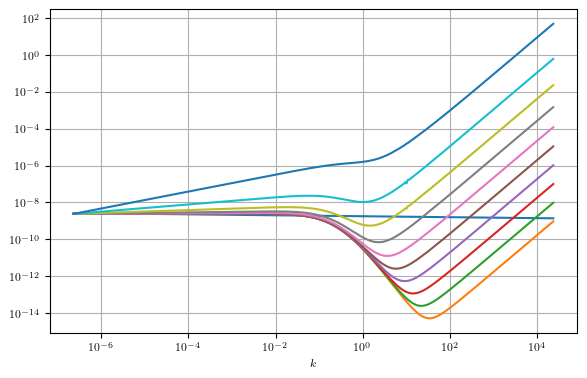

In [19]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)

lnk_a = np.linspace(np.log(1.0e-3), np.log(1.0e8), 1000)
lnw_a = np.linspace(np.log(1.0e-5), np.log(1.0e-1), 100)

lnPk = np.array([hiprim_pl.lnSA_powspec_lnk(lnk) for lnk in lnk_a])
ax1.plot(np.exp(lnk_a) / RH_Mpc, np.exp(lnPk), label=r"$k^3|\zeta|^2$")
hiprim_2f.props.lnk0 = 0.0

for lnw in lnw_a[::10]:
    hiprim_2f.props.lnw = lnw

    lnPk = np.array([hiprim_2f.lnSA_powspec_lnk(lnk) for lnk in lnk_a])

    ax1.plot(np.exp(lnk_a) / RH_Mpc, np.exp(lnPk), label=r"$k^3|\zeta|^2$")

ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r"$k$")
# ax1.legend()
ax1.grid()

pass

In [28]:
def compute_D_ell_tf(lmax=2500):
    cbe_prec = Nc.CBEPrecision.new()
    cbe_prec.props.k_per_decade_primordial = 50.0
    cbe_prec.props.tight_coupling_approximation = 0

    cbe = Nc.CBE.prec_new(cbe_prec)

    Bcbe = Nc.HIPertBoltzmannCBE.full_new(cbe)
    Bcbe.set_TT_lmax(lmax)
    Bcbe.set_target_Cls(Nc.DataCMBDataType.TT)
    Bcbe.set_lensed_Cls(True)

    cosmo = Nc.HICosmoDEXcdm.new()
    cosmo.cmb_params()
    reion = Nc.HIReionCamb.new()
    hiprim = Nc.HIPrimTwoFluids(use_default_calib=True)

    # Bestfit for Planck 2018 - 2F
    cosmo["Omegak"] = 0.0
    cosmo["H0"] = 69.5616151425007
    cosmo["omegab"] = 0.0226931446150128
    cosmo["omegac"] = 0.116422916054973
    hiprim["ln10e10ASA"] = 3.07203761177891
    hiprim["lnk0"] = -6.251936466867
    hiprim["lnw"] = -12.6152819113359
    reion["z_re"] = 8.35735404822378

    cosmo.add_submodel(reion)
    cosmo.add_submodel(hiprim)

    Bcbe.prepare(cosmo)

    Cls_2f = Ncm.Vector.new(lmax + 1)

    Bcbe.get_TT_Cls(Cls_2f)

    Cls_2f_a = np.array(Cls_2f.dup_array())
    Cls_2f_a = np.array(Cls_2f_a[2:])

    ell = np.array(list(range(2, lmax + 1)))

    Dls_2f_a = ell * (ell + 1.0) * Cls_2f_a
    return ell, Dls_2f_a

In [29]:
def compute_D_ell_pl(lmax=2500):
    cbe_prec = Nc.CBEPrecision.new()
    cbe_prec.props.k_per_decade_primordial = 50.0
    cbe_prec.props.tight_coupling_approximation = 0

    cbe = Nc.CBE.prec_new(cbe_prec)

    Bcbe = Nc.HIPertBoltzmannCBE.full_new(cbe)
    Bcbe.set_TT_lmax(lmax)
    Bcbe.set_target_Cls(Nc.DataCMBDataType.TT)
    Bcbe.set_lensed_Cls(True)

    cosmo = Nc.HICosmoDEXcdm.new()
    cosmo.cmb_params()
    reion = Nc.HIReionCamb.new()
    hiprim = Nc.HIPrimPowerLaw()

    # Bestfit for Planck 2018 - PL
    cosmo["Omegak"] = 0.0
    cosmo["H0"] = 68.2682642143184
    cosmo["omegab"] = 0.0223445767610612
    cosmo["omegac"] = 0.1189257178946
    hiprim["ln10e10ASA"] = 3.04632994161073
    hiprim["n_SA"] = 0.967382455314431
    reion["z_re"] = 7.79677265563444

    cosmo.add_submodel(reion)
    cosmo.add_submodel(hiprim)

    Bcbe.prepare(cosmo)

    Cls_2f = Ncm.Vector.new(lmax + 1)

    Bcbe.get_TT_Cls(Cls_2f)

    Cls_2f_a = np.array(Cls_2f.dup_array())
    Cls_2f_a = np.array(Cls_2f_a[2:])

    ell = np.array(list(range(2, lmax + 1)))

    Dls_2f_a = ell * (ell + 1.0) * Cls_2f_a
    return ell, Dls_2f_a

In [30]:
ell, Dell_2f = compute_D_ell_tf()
_, Dell_pl = compute_D_ell_pl()

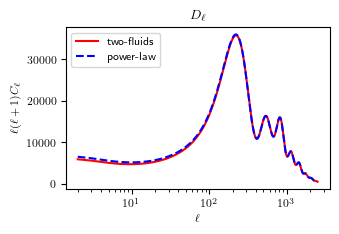

In [32]:
plt.title(r"$D_\ell$")
plt.plot(ell, Dell_2f, "r", label="two-fluids")
plt.plot(ell, Dell_pl, "b--", label="power-law")

plt.xscale("log")
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)C_\ell$")
plt.legend(loc="best")
plt.savefig("hiprim_Dls.pdf")

In [23]:
ser = Ncm.Serialize.new(Ncm.SerializeOpt.CLEAN_DUP)
hiprim_2f_data = Ncm.ObjDictStr.new()
hiprim_2f_data.set("normalized:Pk", s)
hiprim_2f_data.set("Pk0", s0)
hiprim_2f_var = ser.dict_str_to_binfile(hiprim_2f_data, "hiprim_2f_var2.bin")

In [24]:
test_hiprim_2f = Nc.HIPrimTwoFluids(use_default_calib=True)

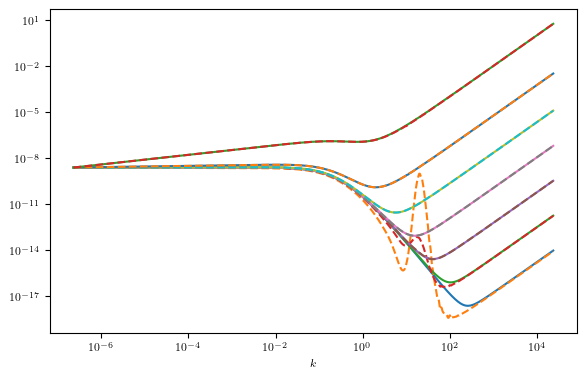

In [25]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)

lnk_a = np.linspace(np.log(1.0e-3), np.log(1.0e8), 1000)
lnw_a = np.linspace(np.log(1.0e-7), np.log(1.0e-1), 100)
hiprim_2f.props.lnk0 = 0.0
test_hiprim_2f.props.lnk0 = 0.0

for lnw in lnw_a[::15]:
    hiprim_2f.props.lnw = lnw
    test_hiprim_2f.props.lnw = lnw

    lnPk_test = np.array([test_hiprim_2f.lnSA_powspec_lnk(lnk) for lnk in lnk_a])
    lnPk = np.array([hiprim_2f.lnSA_powspec_lnk(lnk) for lnk in lnk_a])

    ax1.plot(np.exp(lnk_a) / RH_Mpc, np.exp(lnPk_test), label=r"$k^3|\zeta|^2$")
    ax1.plot(
        np.exp(lnk_a) / RH_Mpc, np.exp(lnPk), label=r"$k^3|\zeta|^2$", linestyle="--"
    )

ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r"$k$")
# ax1.legend()

pass

Expected slope: -2.5
Reference point: w = 1.0e-9, lnPk0 = -82.379025


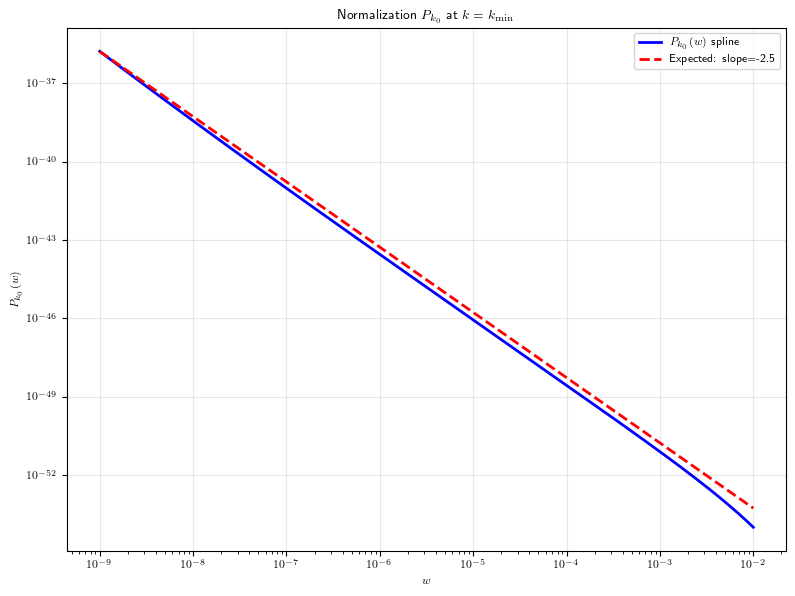

In [26]:
set_rc_params_article(ncol=1)
fig, ax1 = plt.subplots(figsize=(8, 6))

w_final = 1.0e-2

# Plot the Pk0 spline
lnw_plot = np.linspace(np.log(1.0e-9), np.log(w_final), 1000)
lnPk0_plot = np.array([s0.eval(lnw) for lnw in lnw_plot])

ax1.plot(
    np.exp(lnw_plot),
    np.exp(lnPk0_plot),
    "b-",
    linewidth=2,
    label=r"$P_{k_0}(w)$ spline",
)

# Add expected slope line (slope = -2.5)
expected_slope = -2.5
lnPk0_expected = expected_slope * (lnw_plot - np.log(1.0e-9)) + s0.eval(np.log(1.0e-9))
Pk0_expected = np.exp(lnPk0_expected)

ax1.plot(
    np.exp(lnw_plot),
    Pk0_expected,
    "r--",
    linewidth=2,
    label=f"Expected: slope={expected_slope}",
)

ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r"$w$")
ax1.set_ylabel(r"$P_{k_0}(w)$")
ax1.set_title(r"Normalization $P_{k_0}$ at $k = k_{\rm min}$")
ax1.legend(loc="best")
ax1.grid(True, alpha=0.3)

plt.tight_layout()

print(f"Expected slope: {expected_slope}")
print(f"Reference point: w = 1.0e-9, lnPk0 = {s0.eval(np.log(1.0e-9)):.6f}")

pass

In [27]:
# Verify the scaling by checking individual points
w_test = np.geomspace(1.0e-9, 1.0e-1, 10)
for w in w_test:
    Pk0_spline = np.exp(s0.eval(np.log(w)))
    print(
        f"w = {w:.2e}, Pk0 = {Pk0_spline:.6e}, log10(Pk0) = {np.log10(Pk0_spline):.4f}"
    )

w = 1.00e-09, Pk0 = 1.672030e-36, log10(Pk0) = -35.7768
w = 7.74e-09, Pk0 = 7.155781e-39, log10(Pk0) = -38.1453
w = 5.99e-08, Pk0 = 3.530646e-41, log10(Pk0) = -40.4521
w = 4.64e-07, Pk0 = 1.930282e-43, log10(Pk0) = -42.7144
w = 3.59e-06, Pk0 = 1.123937e-45, log10(Pk0) = -44.9493
w = 2.78e-05, Pk0 = 6.698895e-48, log10(Pk0) = -47.1740
w = 2.15e-04, Pk0 = 3.921281e-50, log10(Pk0) = -49.4066
w = 1.67e-03, Pk0 = 1.991361e-52, log10(Pk0) = -51.7009
w = 1.29e-02, Pk0 = 3.956985e-55, log10(Pk0) = -54.4026
w = 1.00e-01, Pk0 = 7.377332e-60, log10(Pk0) = -59.1321
